In [34]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.manifold import TSNE
import pickle
# from Bio.Cluster import kcluster
import os
import numpy as np
import yaml
import os
import pandas
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import seaborn as sns
# import pyclustering
import matplotlib.pylab as plt
import seaborn as sb
from os.path import join
plt.rcParams['figure.dpi'] = 400

from shutil import copyfile
import matplotlib.pyplot as plt
# ------- SERVER EXTENSIONS ---------
lib =  r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities/droplet_dataset'
lib2 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities'
lib3 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/data_analysis'
lib4 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy'
lib5 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/scripts'
import sys
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
# ------- SERVER EXTENSIONS ---------

In [51]:
tumor_path = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/5.21/tumor_cells_4k_genes.pkl'
TSNE_PATH = r'/storage/md_keren/shitay/outputs/TSNE/cohort_10.5.21/tumor_cells_bhtsne_11.5.21.pkl'
cells_embedded = pickle.load(open(TSNE_PATH, 'rb'))
EXEC_DIR = r'/storage/md_keren/shitay/outputs/cNMF/executions/tumor_runs/cohort_10.5.21/k21_2000genes_200iter'

tumor_cohort = pickle.load(open(tumor_path, 'rb'))

cells_embedded = pickle.load(open(TSNE_PATH, 'rb'))
# tsne_results = pd.DataFrame(cells_embedded, index=tumor_cohort.barcodes, columns=['TSNE1', 'TSNE2'])
index = [tumor_cohort.samples[i]+"_"+tumor_cohort.barcodes[i] for i in range(tumor_cohort.number_of_cells)]
tsne_results = pd.DataFrame(cells_embedded, index=index, columns=['TSNE1', 'TSNE2']) 

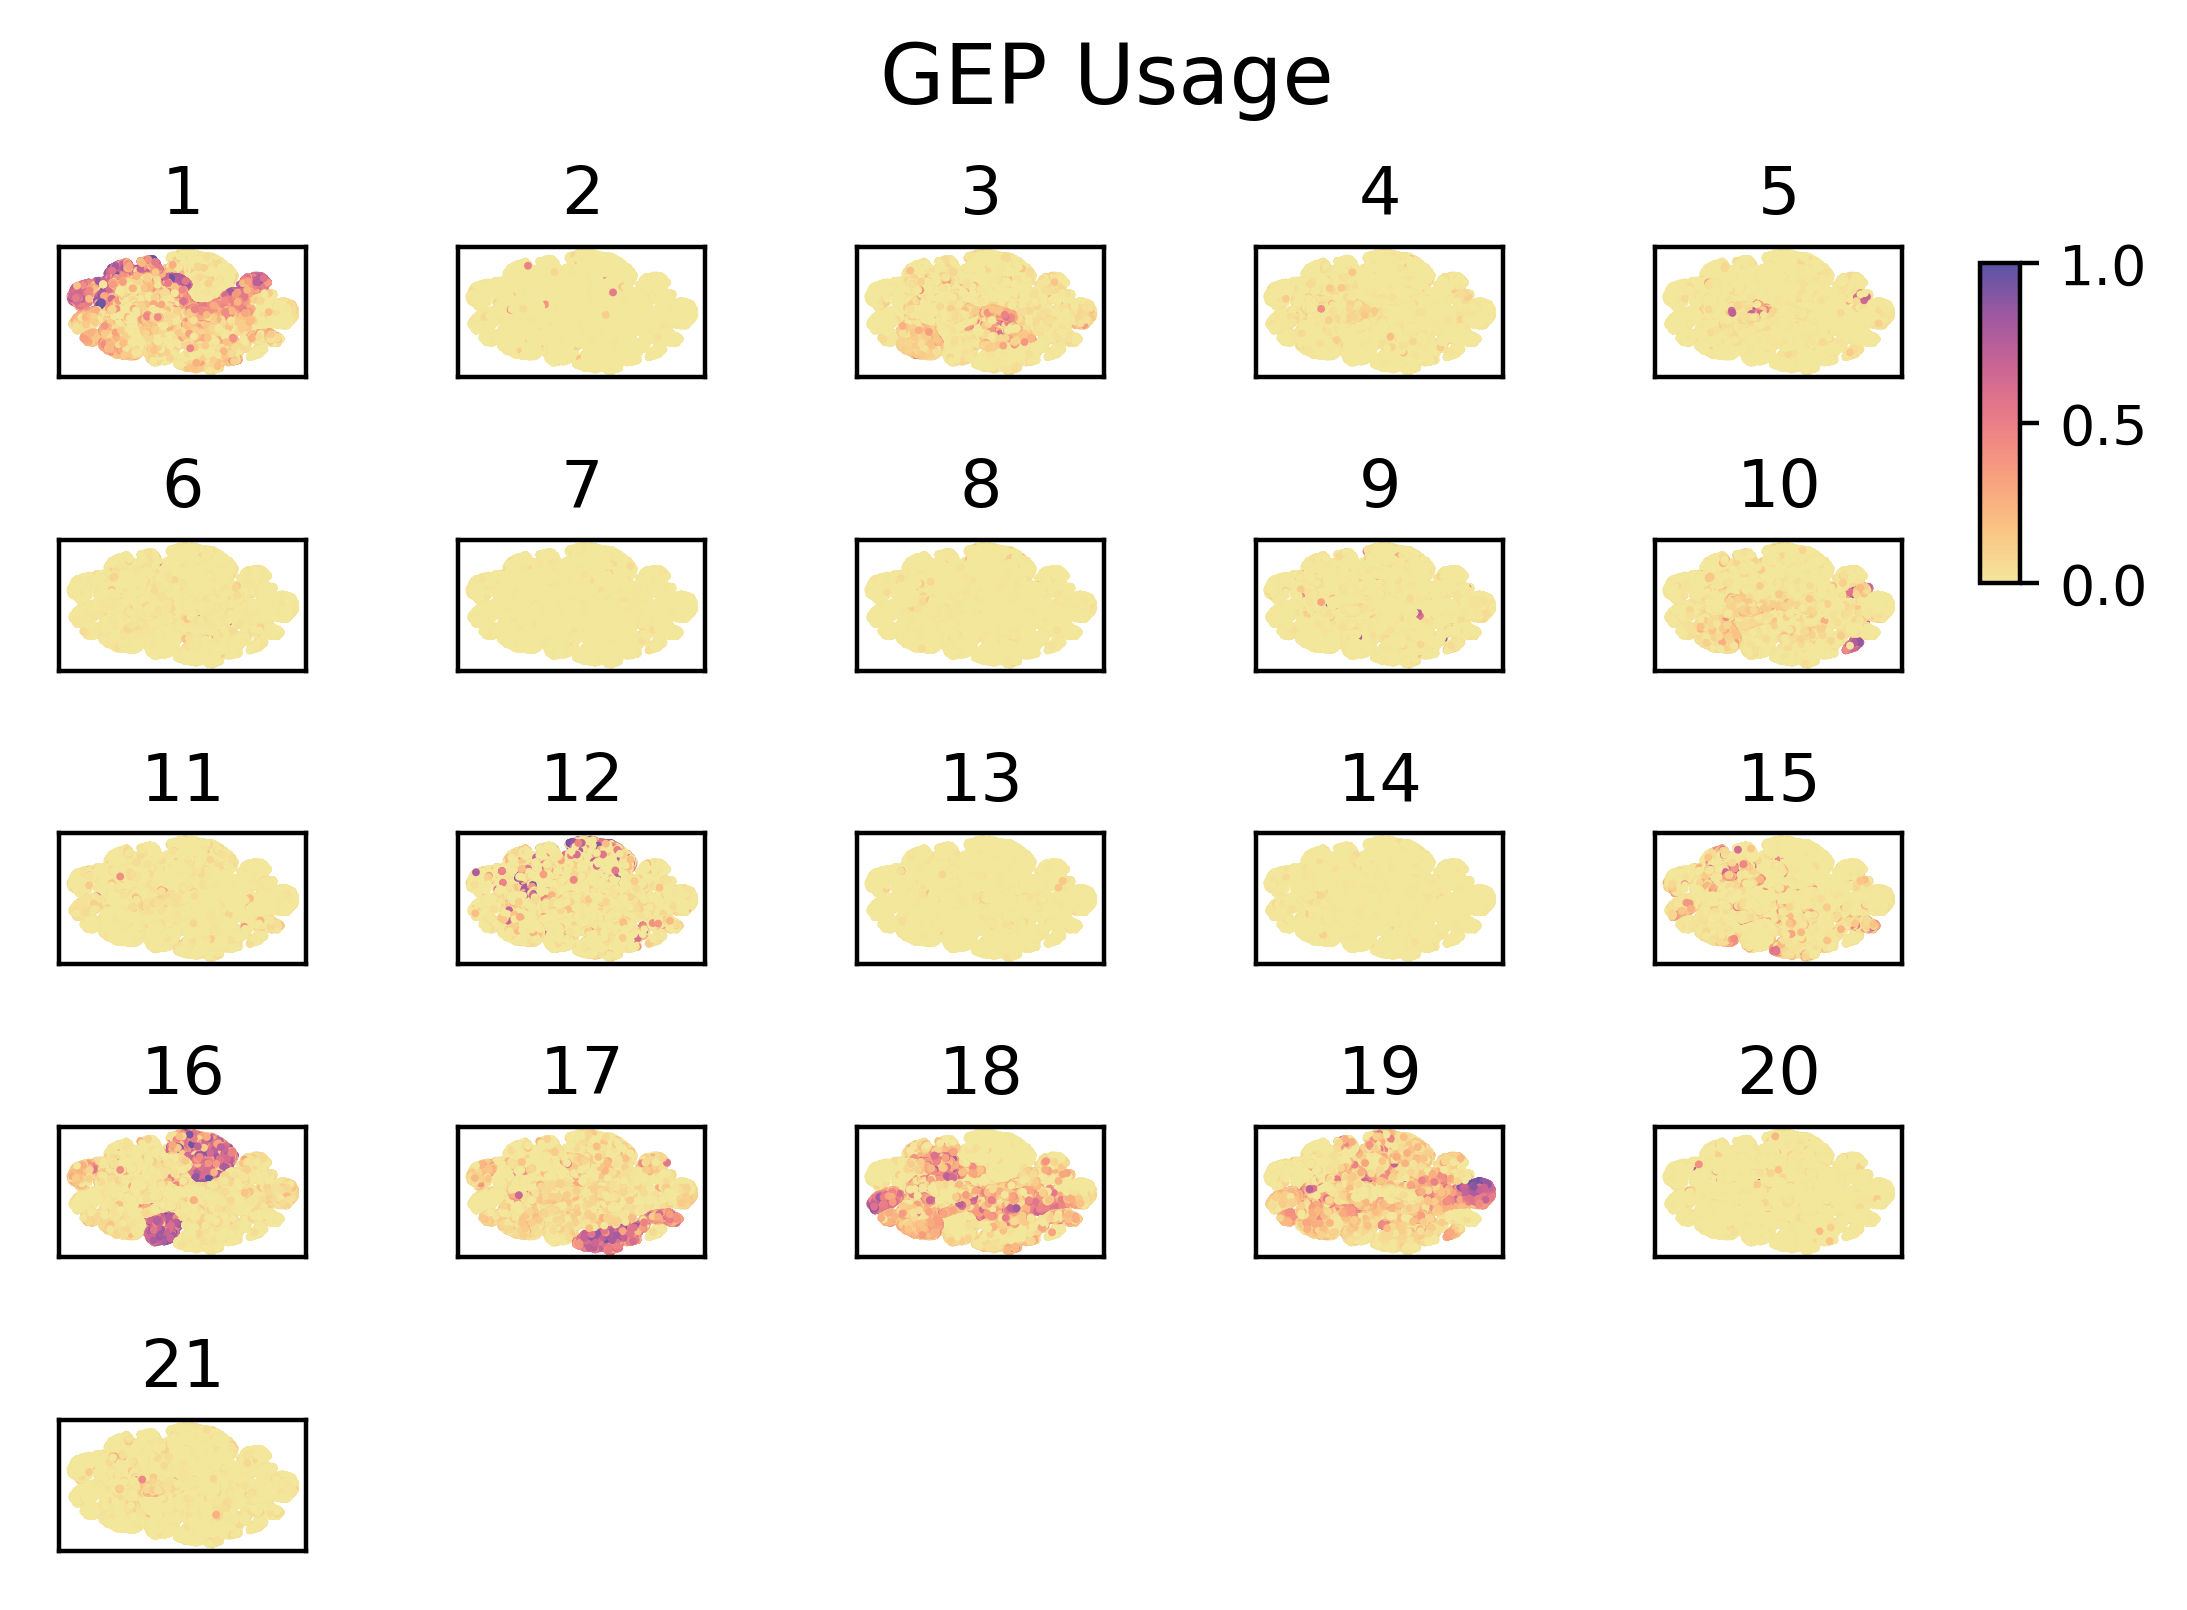

In [50]:
# import palettable
# cmap = palettable.cartocolors.sequential.Sunset_7.get_mpl_colormap()

USAGES_CONSENSUS_FILE = r'k21_2000genes_200iter.usages.k_21.dt_0_10.consensus.txt'

selected_K = 21
usage_matrix = pd.read_csv(join(EXEC_DIR, USAGES_CONSENSUS_FILE), sep='\t', index_col=0)
usage_matrix.columns = np.arange(1,selected_K+1)
normalized_usage_matrix = usage_matrix.div(usage_matrix.sum(axis=1), axis=0)
normalized_usage_matrix.head()


cmap = pickle.load(open(r'/storage/md_keren/shitay/garbage/cmap.pkl', 'rb'))
tsne_and_usages = pd.merge(left=normalized_usage_matrix, right=tsne_results, left_index=True, right_index=True)





(fig,axes) = plt.subplots(5, 5, figsize=(5,4), dpi=400)
axes = axes.ravel()
for i in range(1, selected_K+1):
    sc = axes[i-1].scatter(tsne_and_usages['TSNE1'], tsne_and_usages['TSNE2'], c=tsne_and_usages[i],
                      cmap=cmap, vmin=0, vmax=1.,
                      s=2, edgecolor='none', rasterized=True)
    axes[i-1].set_title(i)
    axes[i-1].set_xticks([])
    axes[i-1].set_yticks([])
    
    
    

plt.tight_layout()
cbarax = fig.add_axes([1,.7,.02, .2])
plt.colorbar(sc, cax=cbarax)
_ = plt.figtext(.45,1,'GEP Usage', fontsize=15)
axes[-1].remove()
axes[-2].remove()
axes[-3].remove()
axes[-4].remove()

In [10]:
# fig.savefig('/storage/md_keren/shitay/garbage/foo.png')

We might also want to investigate which genes are driving which programs. We can do so by loading the Z-score transformed spectra and sorting it as follows

In [53]:
EXEC_DIR
GENE_SPECTRA_SCORE_PATH = 'k21_2000genes_200iter.gene_spectra_score.k_21.dt_0_10.txt'
gene_scores = pd.read_csv(join(EXEC_DIR, GENE_SPECTRA_SCORE_PATH), sep='\t', index_col=0)
gene_scores = gene_scores.T
gene_scores.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
TSPAN6,-0.000291,-0.000010,-0.000050,-0.000068,-0.000035,-0.000184,-0.000073,0.000585,0.000274,-0.000394,...,-0.000181,-0.000106,0.000030,0.000060,0.000278,0.000822,-0.000262,0.000110,-0.000169,0.000284
TNMD,-0.000156,0.000040,0.000013,0.000165,0.000375,0.000106,-0.000008,-0.000006,0.000259,-0.000085,...,-0.000057,-0.000023,-0.000015,0.000003,0.000113,0.000005,-0.000124,-0.000104,-0.000021,-0.000020
DPM1,-0.000434,-0.000052,0.000366,-0.000042,-0.000078,-0.000044,-0.000010,-0.000053,-0.000052,0.000030,...,-0.000094,0.000066,-0.000070,0.000726,-0.000202,0.001260,0.000127,-0.000829,-0.000058,0.000480
SCYL3,-0.000246,0.000307,0.000072,-0.000037,-0.000065,0.000315,0.000021,0.000119,-0.000008,0.000008,...,0.000039,-0.000020,0.000012,-0.000096,-0.000076,0.000576,-0.000214,0.000166,0.000015,0.000190
C1orf112,-0.000491,-0.000092,-0.000177,-0.000063,-0.000068,0.000020,-0.000046,-0.000055,-0.000015,0.000048,...,-0.000055,0.000027,0.001654,0.002040,-0.000496,0.000982,-0.000249,-0.000212,0.000196,0.000010


# Below we plot the top 10 genes associated with each gene expression program


In [54]:
topgenes = []
num_top_genes=10
for gep in gene_scores.columns:
    topgenes.append(pd.Series(gene_scores[gep].sort_values(ascending=False).index[:num_top_genes]))
    
topgenes = pd.concat(topgenes, axis=1)
topgenes.columns = ['GEP%d' % g for g in gene_scores.columns]

topgenes

,GEP1,GEP2,GEP3,GEP4,GEP5,GEP6,GEP7,GEP8,GEP9,GEP10,...,GEP12,GEP13,GEP14,GEP15,GEP16,GEP17,GEP18,GEP19,GEP20,GEP21
0,RPL37,RBP4,HLA-DPA1,SLPI,COL1A2,APLP1,LY6D,APCS,PLVAP,CAPS,...,TYROBP,AC068134.6,SPANXN1,CENPF,CITED1,MPZ,S100A6,MT-CYB,MZB1,PTN
1,RPS5,AMBP,HLA-B,KLK11,COL1A1,MOG,KRT6A,CRP,ECSCR,TESC,...,TMSB4X,MAGEB3,FAM170B-AS1,TOP2A,RPL30,CYR61,ATOX1,MT-ND5,DERL3,CCT2
2,RPL18,ALB,CD74,ANXA8L2,COL3A1,CNTN2,CALML3,FGG,ENG,PMEPA1,...,AIF1,CTB-7E3.1,RP3-390M24.1,UBE2C,RPL8,MDK,LGALS3,MT-ATP6,RP11-16E12.2,RAP1B
3,RPS19,APOA1,HLA-A,LRRN4,MFAP5,SLAIN1,KRT16,DEFB1,CD93,RELN,...,FCER1G,AC009262.2,AP001476.3,H2AFZ,EXOC3,COL2A1,LGALS1,MT-ND4,CD79A,CHN1
4,RPS16,APOA2,B2M,PRG4,COL5A1,CLDN11,KRT6C,ARL14,VWF,ELN,...,LAPTM5,KISS1,AC104777.4,BIRC5,PABPC1,PMP22,CAPG,MT-ND2,FCRL5,TNN
5,RPS21,APOC3,RARRES2,UPK3B,FSTL1,NKX6-2,C10orf99,LGALS4,CLEC14A,IGFBP3,...,C1QC,RTL1,RP11-319E12.1,HMGN2,NDUFB9,NR4A1,PKM,MT-CO2,TNFRSF17,CPSF6
6,RPS15,APOH,HLA-DRB1,EGFL6,DCN,KLK6,LGALS7B,PDZK1IP1,CDH5,GAL3ST1,...,C1QB,SCGB2A2,KRTAP4-2,UBE2S,ZNF106,PALMD,GAPDH,FXYD3,IGJ,OTOR
7,RPL18A,SERPINA1,HLA-DRA,MUC16,DPT,PLP1,MIR205HG,FGA,RAMP3,THBS2,...,C1QA,AC102948.2,CTD-2275D24.4,HMGB2,SERPINF1,RHOB,SH3BGRL3,MT-CO3,XBP1,FST
8,RPL28,KNG1,CTSZ,CALB2,FBN1,SLC24A2,SPRR2A,SPINK1,HSPG2,KLHDC8A,...,SRGN,CT83,RP11-523L1.2,MKI67,ARID5B,CTGF,S100A11,MT-ND4L,RP11-731F5.2,ITIH5
9,RPS3,HRG,HLA-DRB5,KIAA1199,FBLN2,HEPACAM,IVL,FGB,CXorf36,C9orf169,...,MS4A6A,MTNR1B,RP11-317J10.4,CDKN3,RPL5,NCKAP5,PHLDA2,MT-ATP8,PIM2,GAGE12J


In [55]:
tsne_and_usages.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,TSNE1,TSNE2
M100_AAACCTGAGAAACCAT-1,0.348779,0.0,0.000000,0.000000,0.000000,0.010720,0.000000,0.000000,0.0,0.00000,...,0.016572,0.0,0.056551,0.061356,0.061948,0.401401,0.000000,0.000000,18.195467,0.661564
M100_AAACCTGAGACGCAAC-1,0.396664,0.0,0.010583,0.000000,0.000000,0.013297,0.000000,0.000000,0.0,0.04277,...,0.000000,0.0,0.004277,0.066982,0.216708,0.223590,0.000000,0.000000,17.022345,1.194204
M100_AAACCTGAGGATTCGG-1,0.060381,0.0,0.000000,0.002288,0.000000,0.012581,0.021047,0.000000,0.0,0.00000,...,0.000000,0.0,0.028829,0.001669,0.231250,0.641955,0.000000,0.000000,17.926779,-6.648245
M100_AAACCTGAGGGCATGT-1,0.523646,0.0,0.000000,0.000000,0.000000,0.010718,0.000000,0.000000,0.0,0.00000,...,0.002939,0.0,0.056159,0.232461,0.174022,0.000000,0.000000,0.000055,17.047988,2.669005
M100_AAACCTGCACGAGAGT-1,0.156544,0.0,0.019837,0.000000,0.009748,0.000000,0.000000,0.002169,0.0,0.00000,...,0.000000,0.0,0.133328,0.185166,0.140711,0.337115,0.005518,0.000000,16.951232,-3.612657


# Visualizing

In [157]:
normalized_usage_matrix.head()
normalized_usage_matrix.iloc[['1']]
# normalized_usage_matrix
samples = list(set([uu.split('_')[0] for uu in list(normalized_usage_matrix.index)]))


total sum expression of samples in program

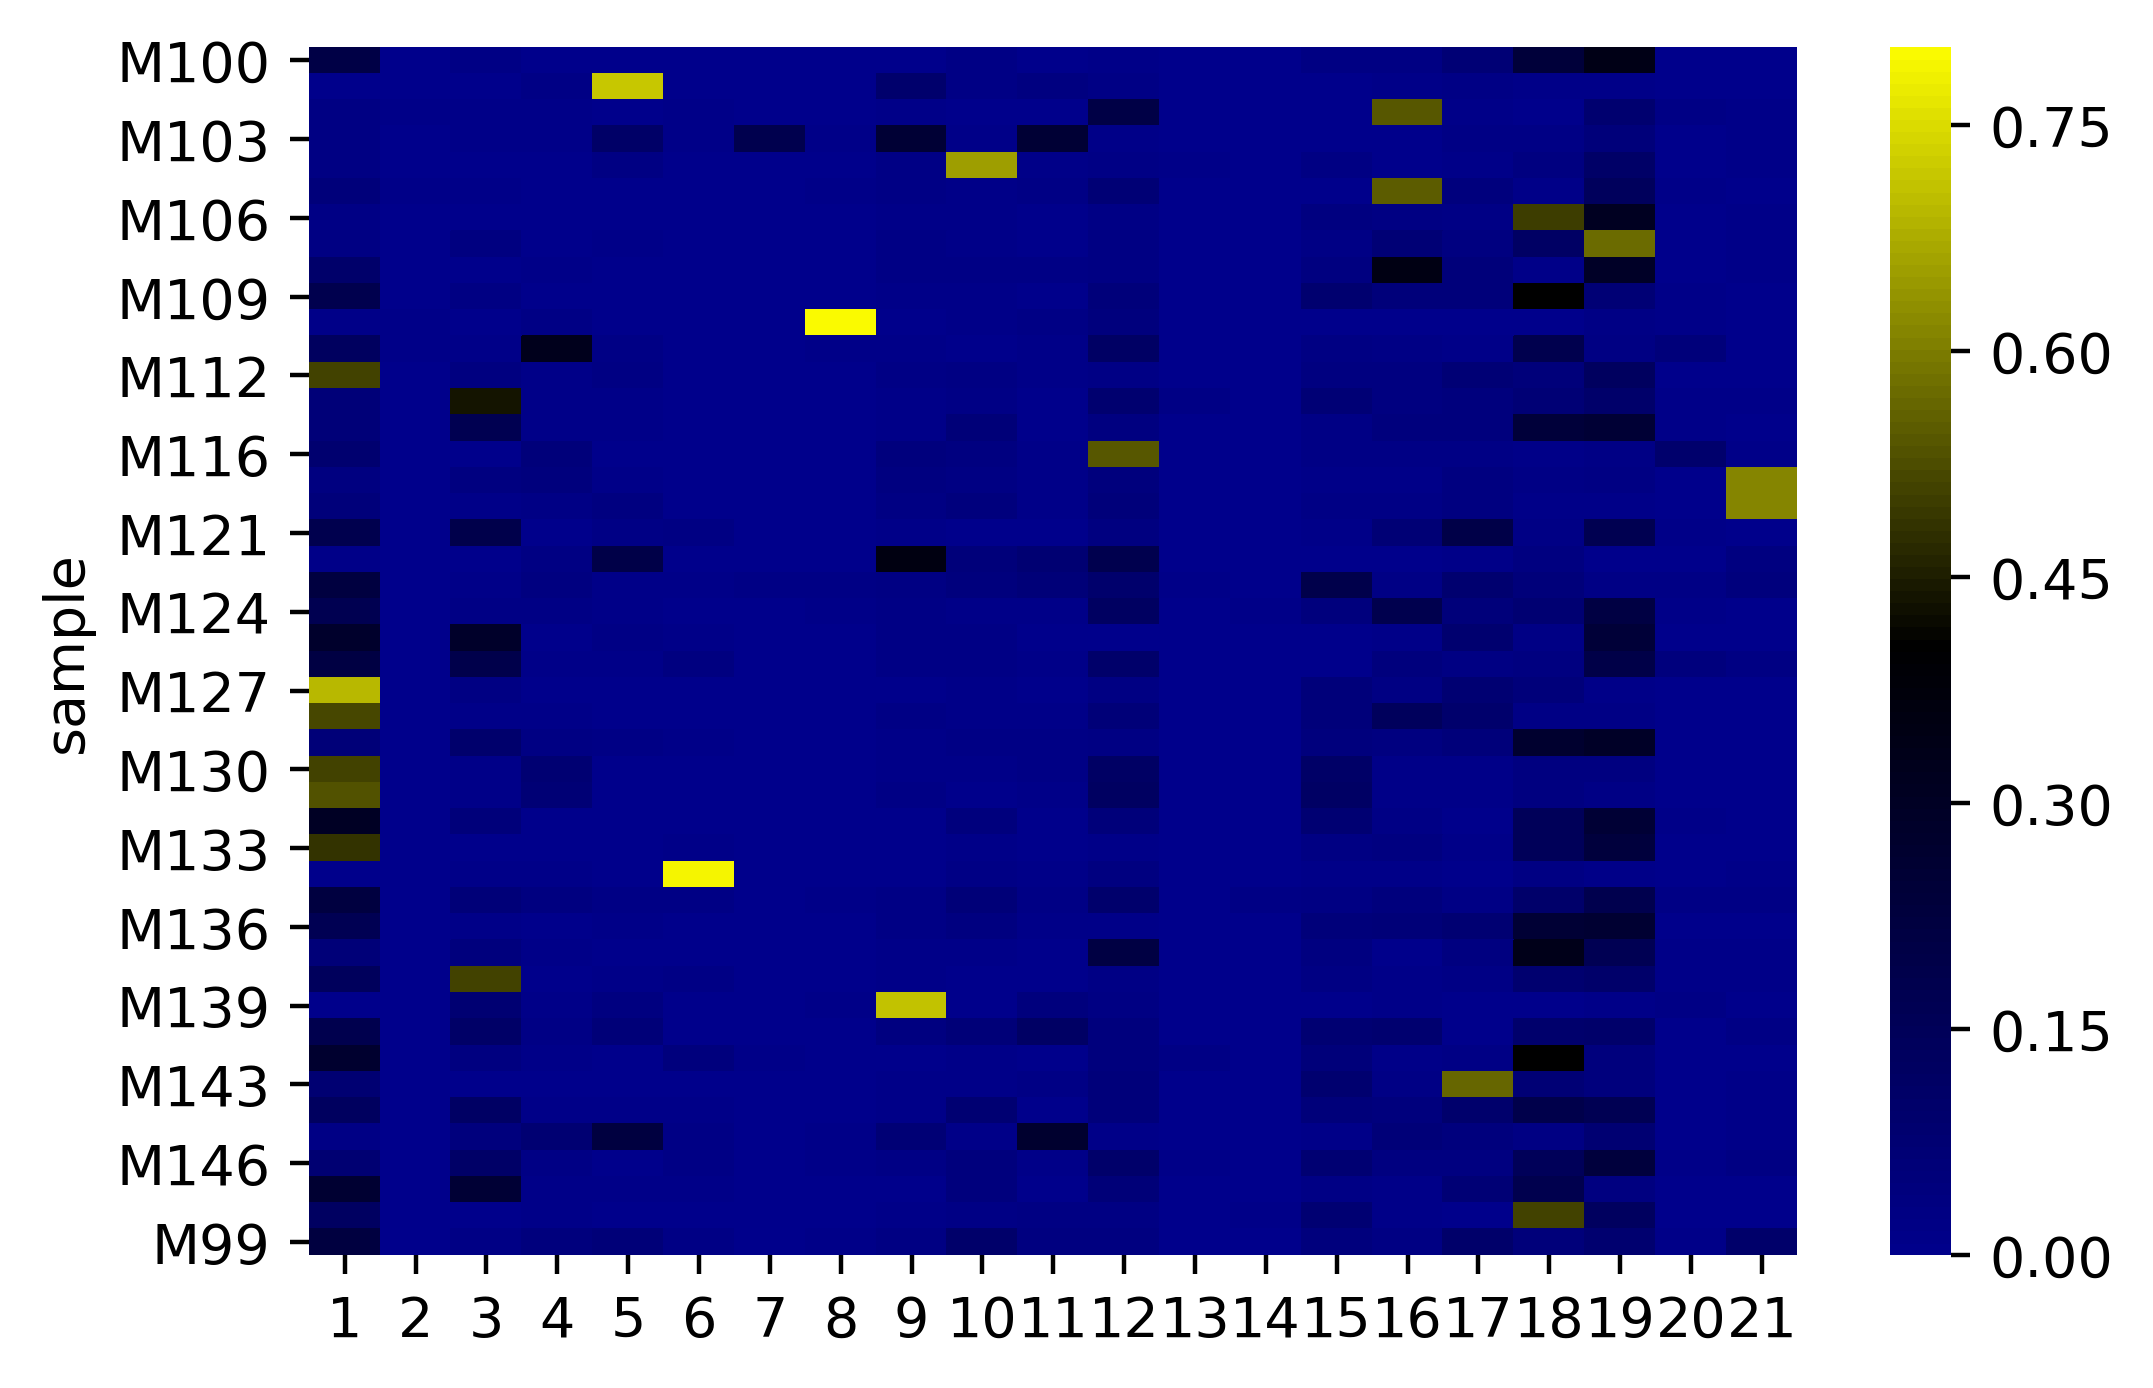

In [161]:
import seaborn as sb

df = normalized_usage_matrix.copy()

df['sample'] = [uu.split('_')[0] for uu in list(df.index)]
df['barcode'] = [uu.split('_')[1] for uu in list(df.index)]
df = df.set_index(['sample', 'barcode'])
samples_programs_prop = df.groupby(['sample']).sum() / df.groupby(['sample']).count()
cmap = pickle.load(open(r'/storage/md_keren/shitay/outputs/clustering/heatmap/colorbar.pkl', 'rb'))
sb.heatmap(samples_programs_prop, cmap=cmap);

Specify a a threshold of min expression for cell in a program, and see the percentage of cells expresing each program for all samples

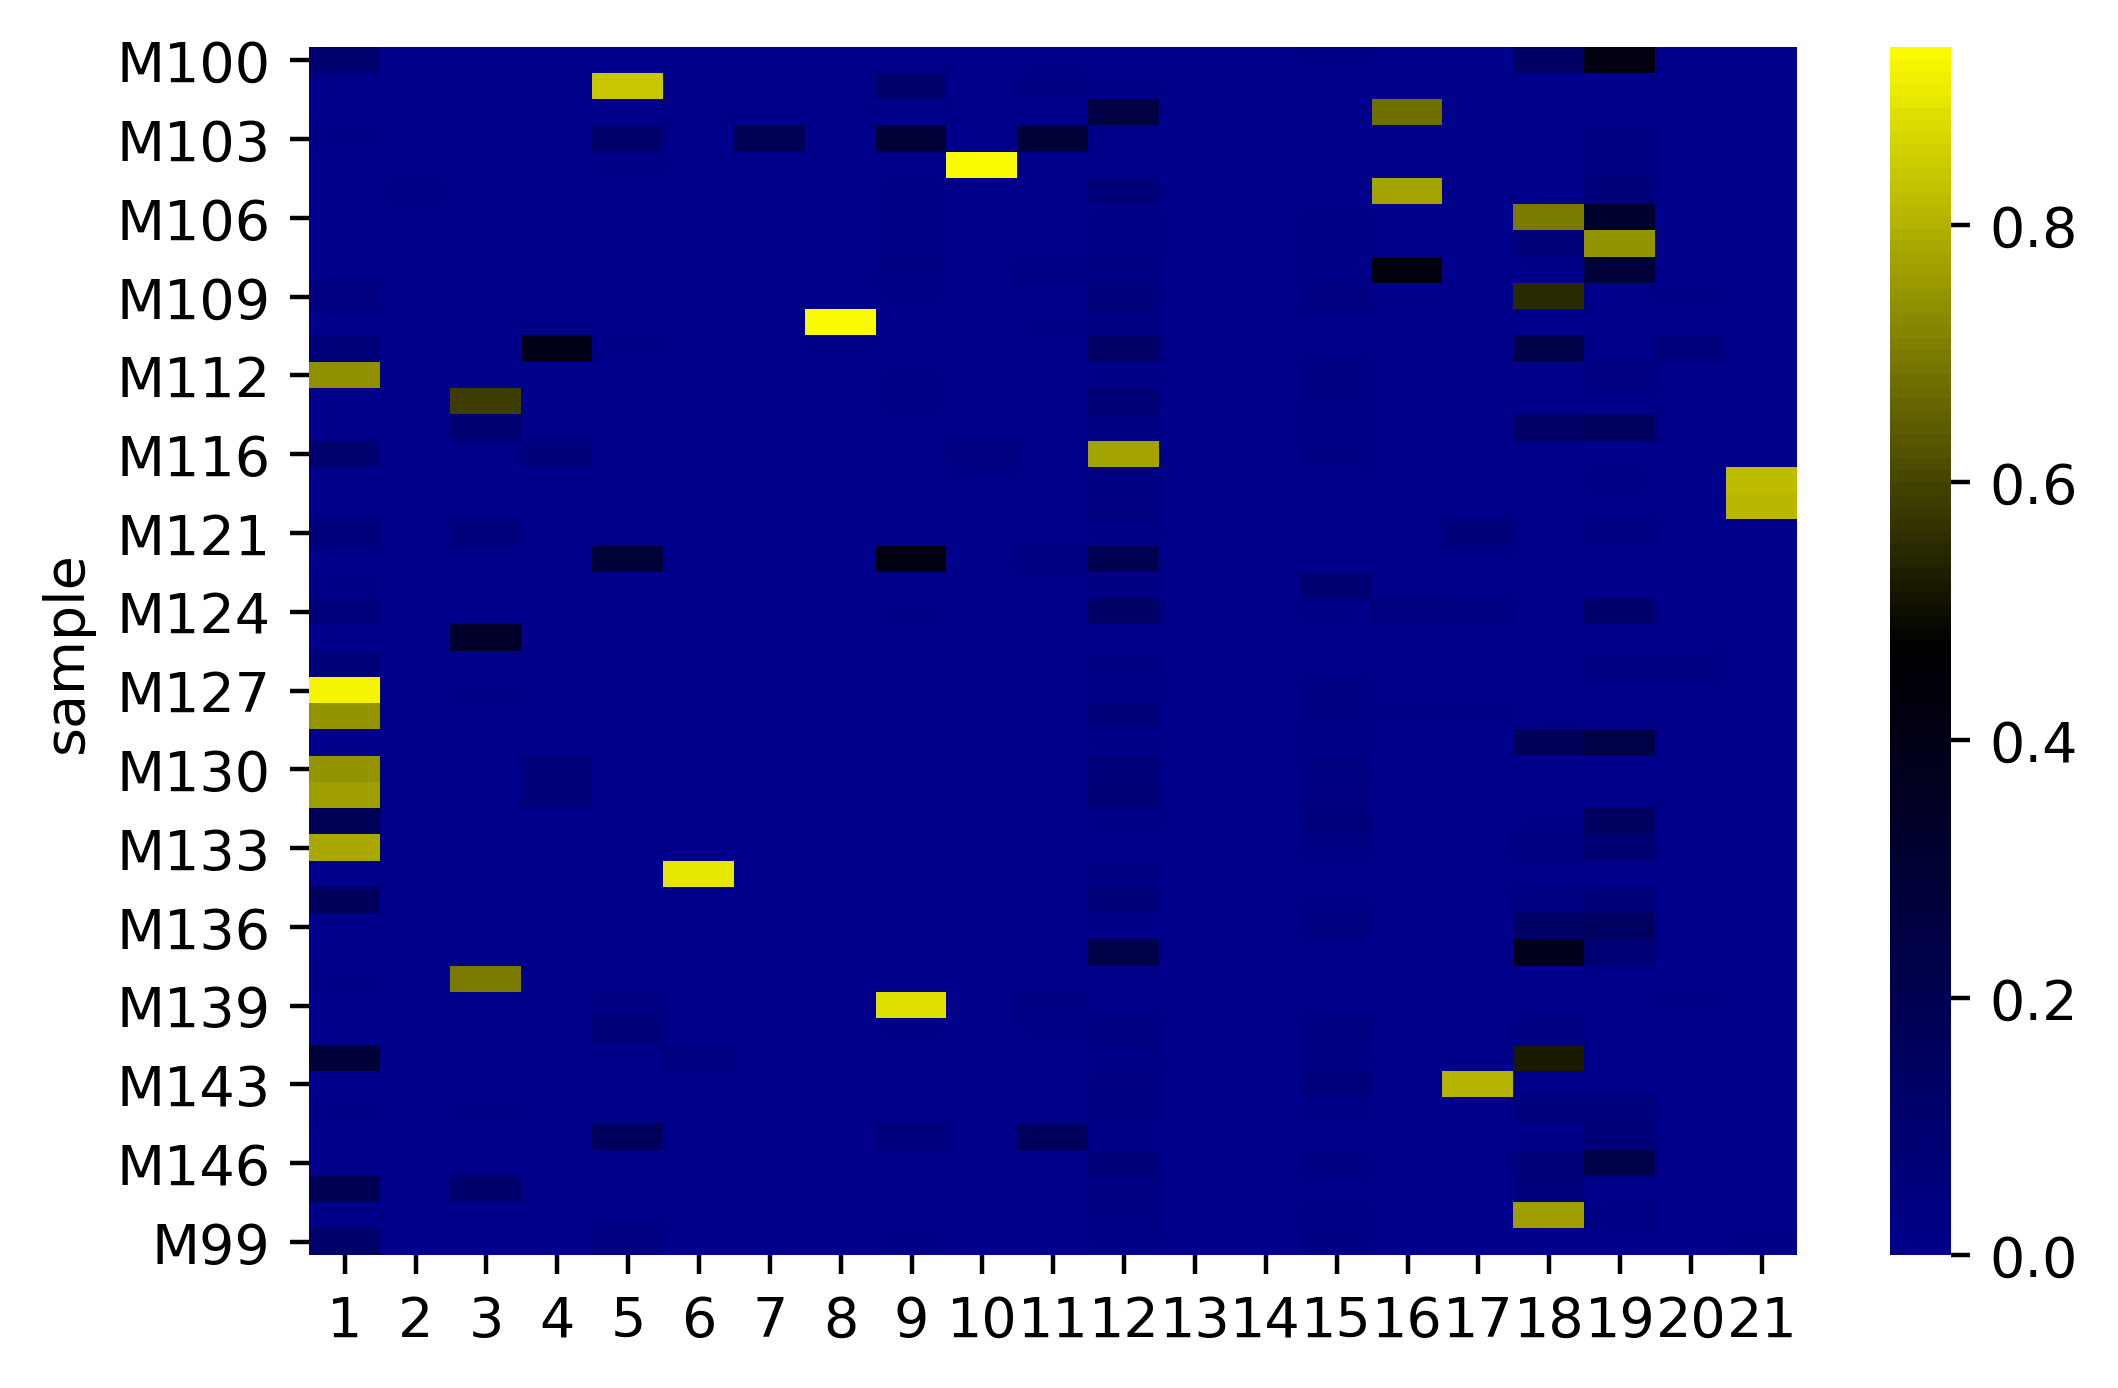

In [171]:
min_expression_to_be_counted = 0.4

df2 = df > min_expression_to_be_counted
portion_expressing_programs = df2.groupby(['sample']).sum() / df2.groupby(['sample']).count()
sb.heatmap(portion_expressing_programs, cmap=cmap);

See all thresholds of min expression for being counted

In [196]:
# fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[4,1,0.2]))
# fig, axs = plt.subplots(ncols=3)
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(32, 22)
# sb.heatmap(portion_expressing_programs, cmap=cmap, ax=axs[0,0]);
# sb.heatmap(portion_expressing_programs, cmap=cmap, ax=axs[1,0]);
import itertools
index = [(x,y) for x in np.arange(3) for y in np.arange(3)]


for i in range(9):
    min_expression_to_be_counted = round(0.1 * (i+1),2)
    df2 = df > min_expression_to_be_counted
    portion_expressing_programs = df2.groupby(['sample']).sum() / df2.groupby(['sample']).count()
    axs[index[i][0], index[i][1]].set_title(f"Threshold - {min_expression_to_be_counted}")
    sb.heatmap(portion_expressing_programs, cmap=cmap, ax=axs[index[i][0], index[i][1]]);

In [197]:
fig.savefig(r'/storage/md_keren/shitay/garbage/different_expression_thresholds.jpg')

# DEBUG

In [14]:
tsne_and_usages.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,TSNE1,TSNE2
AAACCTGAGAAACCAT-1,0.087824,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.008682,0.000000,0.015718,...,0.0,0.720092,0.001506,0.000000,0.000000,0.0,0.000000,0.094913,-3.900592,-19.834571
AAACCTGAGAACTCGG-1,0.768831,0.0,0.044031,0.019201,0.000000,0.000240,0.0,0.022054,0.051434,0.005752,...,0.0,0.076456,0.000000,0.000000,0.007441,0.0,0.000000,0.000000,14.098434,23.714688
AAACCTGAGACCTTTG-1,0.019880,0.0,0.022502,0.000000,0.117267,0.000000,0.0,0.000000,0.000000,0.029020,...,0.0,0.042855,0.000000,0.041144,0.000000,0.0,0.001969,0.000000,-20.978421,14.832084
AAACCTGAGACGCAAC-1,0.125953,0.0,0.000000,0.000000,0.000000,0.028807,0.0,0.013499,0.000000,0.024866,...,0.0,0.485252,0.000000,0.000000,0.000000,0.0,0.168470,0.133814,-3.102349,-18.486351
AAACCTGAGACTAGAT-1,0.050874,0.0,0.000000,0.010145,0.000000,0.006075,0.0,0.000000,0.000000,0.000000,...,0.0,0.058360,0.013497,0.004810,0.029954,0.0,0.050820,0.046267,2.132755,-5.895323


In [21]:
programs_1 = tsne_and_usages[tsne_and_usages.columns[4]].values
programs_1

array([0.        , 0.        , 0.11726703, ..., 0.        , 0.        ,
       0.        ])

In [22]:
len(list(tsne_and_usages.index))

124563

In [30]:
def some_func(x):
    return round(x*10)



ttt = dict(Counter(tsne_and_usages[tsne_and_usages.columns[4]].apply(some_func).values))

# fig, ax = plt.pyplot.subplots()    
# ax.bar(list(ttt.keys()), list(ttt.values()))
# for i, v in enumerate(list(ttt.values())):
#     ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

print({k: v for k, v in sorted(ttt.items(), key=lambda item: item[0])})
sum([vv for k, vv in ttt.items() if k>0])

{0: 112264, 1: 5515, 2: 2293, 3: 1566, 4: 983, 5: 604, 6: 362, 7: 287, 8: 172, 9: 295, 10: 222}


12299

In [32]:
barcodes = np.array(tsne_and_usages.index.tolist())

In [70]:
order = np.flip(np.argsort(programs_1))
barcodes[order][:10]
# programs_1[order][:10]


array(['CTACCCAAGATGCCTT-1', 'GCTGCAGGTACAGTTC-1', 'TAGTGGTTCCACTGGG-1',
       'TGTGGTATCCAAGCCG-1', 'GTCTCGTTCCCTCAGT-1', 'CTAGAGTGTTCTGGTA-1',
       'CAGCTGGCAGCCACCA-1', 'GGCGTGTTCAGGATCT-1', 'ACCAGTATCGCATGAT-1',
       'CTGCTGTAGTTGTAGA-1'], dtype='<U18')

# DEBUG

In [47]:
gene_indices = np.flip(np.argsort(tumor_cohort.counts[tumor_cohort.barcodes.index('CTACCCAAGATGCCTT-1')]))

tumor_cohort.gene_names[gene_indices[6]]

'RPL41'

In [3]:

# tumor_cohort.gene_names.index('CD3E')
tumor_cohort.number_of_genes

4018

In [60]:
tumor_path = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/tumor_cells.pkl'
tumor_cohort = pickle.load(open(tumor_path, 'rb'))

In [66]:
idx = tumor_cohort.gene_names.index('CD3E')

tumor_cohort.counts[tumor_cohort.barcodes.index('GCTGCAGGTACAGTTC-1')][idx]

4.824217576743138

In [72]:
tumor_cohort.samples[tumor_cohort.barcodes.index('GCTGCAGGTACAGTTC-1')]

'M137'

In [92]:
gene_idx = tumor_cohort.gene_names.index('FOXP3')
cell_idx = tumor_cohort.barcodes.index('GGCGTGTTCAGGATCT-1')
tumor_cohort.counts[cell_idx][gene_idx]
tumor_cohort.cells_information[cell_idx].cancer_immune_conflict

True

In [94]:
sum(tumor_cohort.cells_information.getattr('is_doublet'))

5256

In [95]:
sum(tumor_cohort.cells_information.getattr('should_be_removed'))

0

In [96]:
cohort_path = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/cohort.pkl'
cohort = pickle.load(open(tumor_path, 'rb'))

In [100]:
is_doublet = cohort.cells_information.getattr('is_doublet')
cohort.samples
sum(is_doublet)

Counter([cohort.samples[ii] for ii in range(len(cohort.samples)) if is_doublet[ii]])

Counter({'M108': 442, 'M133': 4814})

(124563, 21)


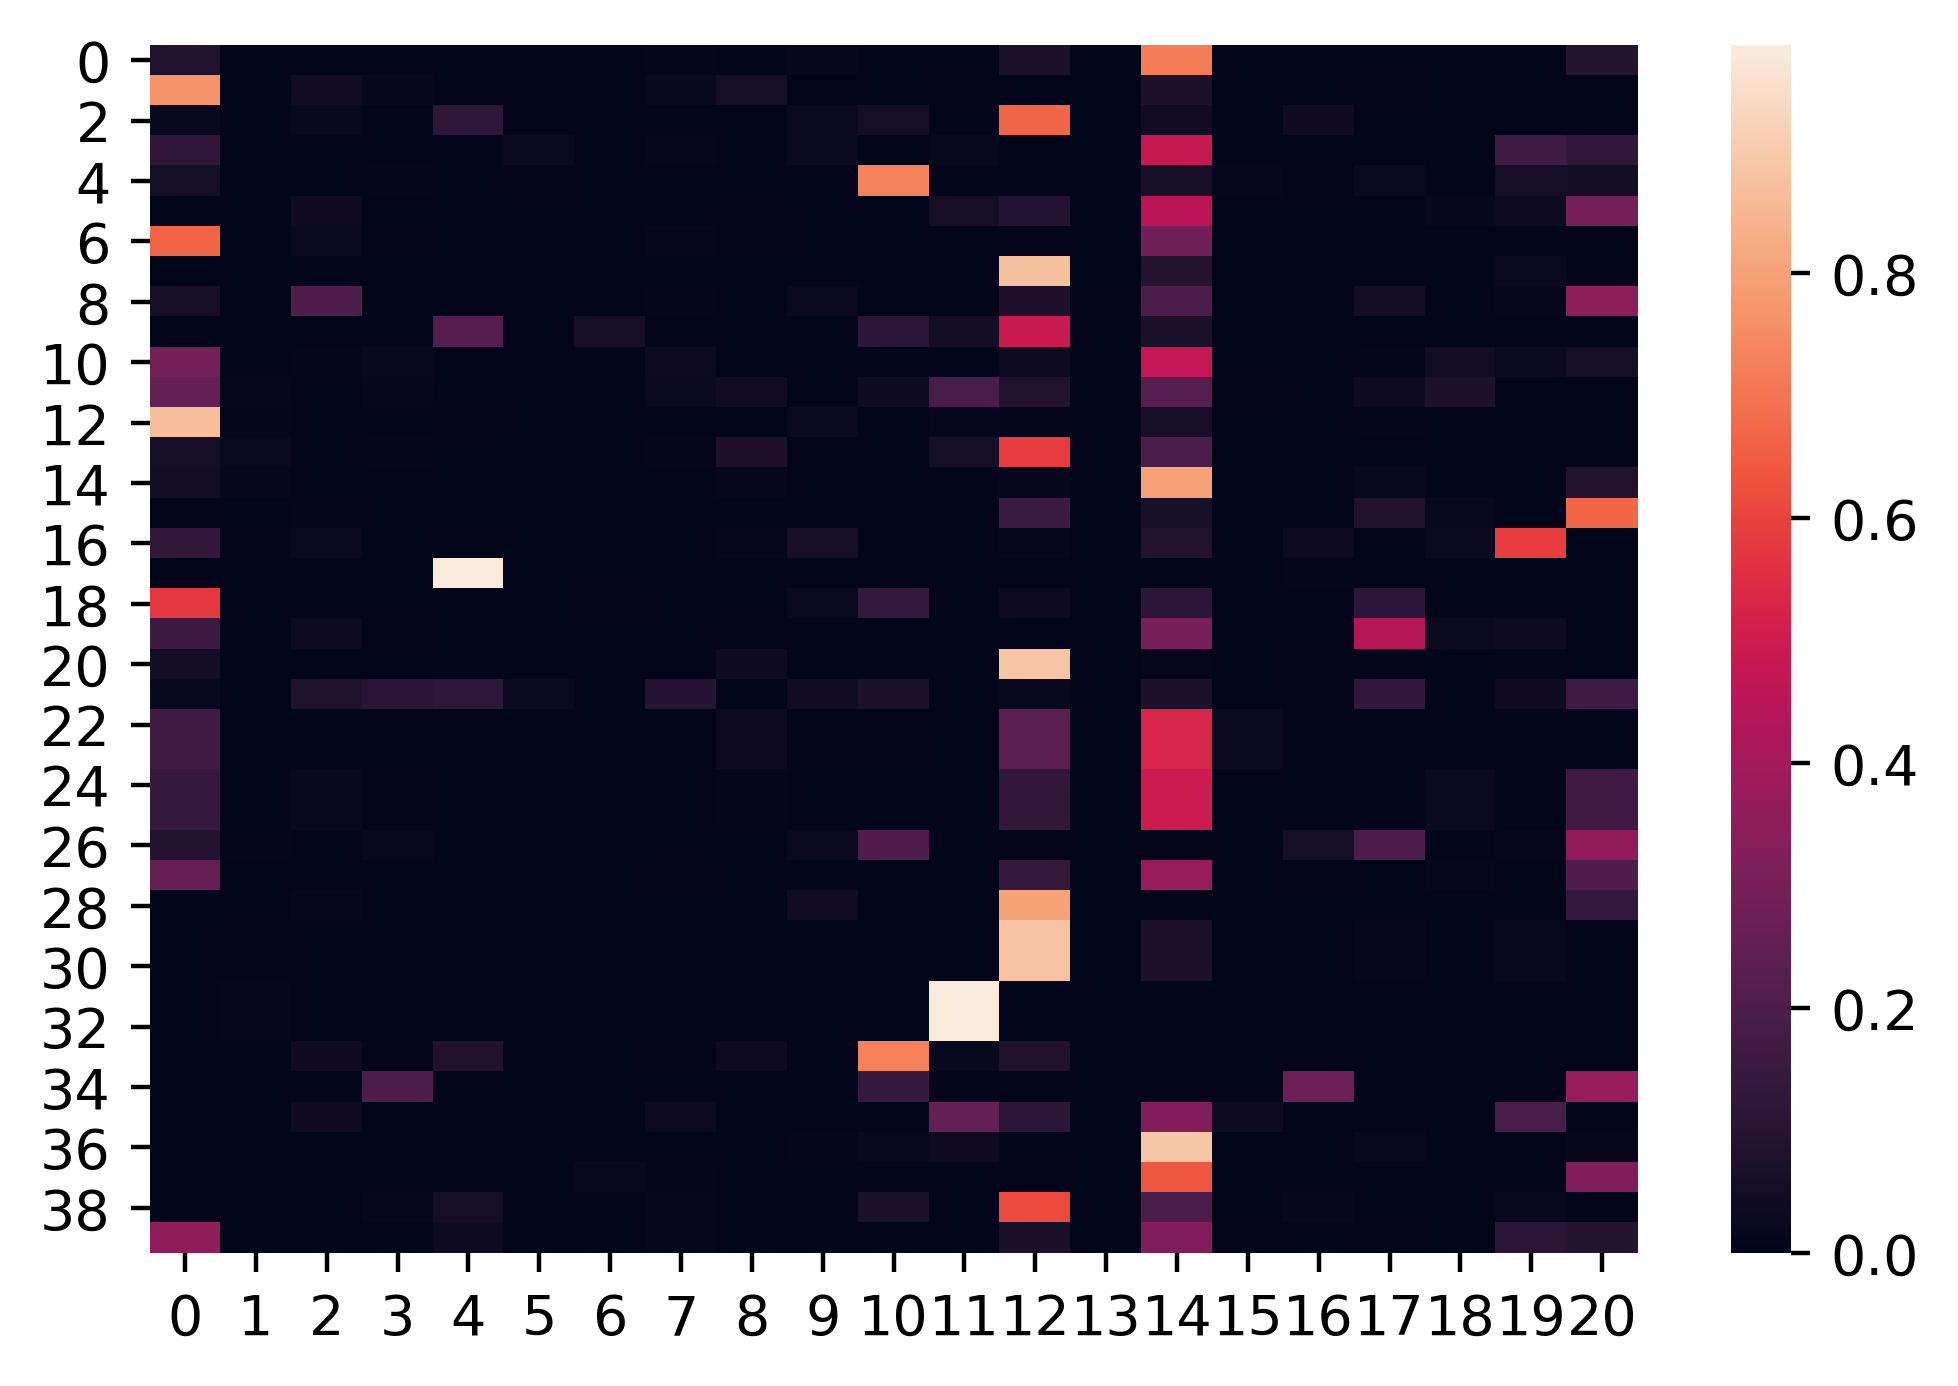

In [56]:
from utilities.general_helpers import annotate_boxplot
uu = tsne_and_usages.values[:,:21]
print(uu.shape)
np.max(uu, axis=1)

import seaborn as sb
sb.heatmap(uu[:40])
